# Importing Required Libraries and Downloading and Loading Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install datasets
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer

from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Embedding, TimeDistributed, Bidirectional
from keras.models import Model
!pip install git+https://www.github.com/keras-team/keras-contrib.git
from keras_contrib.layers import CRF
!pip install keras_preprocessing
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import Callback
!pip install sklearn_crfsuite
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
import torch

# Load the dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 22.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-5fo0wh46
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-5fo0wh46
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wh

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

# Dataset Analysis and Visualization

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 1072
    })
    validation: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 126
    })
    test: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 153
    })
})

In [ ]:
train_data = dataset['train'][5]
validation_data = dataset['validation'][5]
test_data = dataset['test'][5]

In [ ]:
print("Train Data:",train_data)
print("Validation Data:",validation_data)
print("Test Data:",test_data)

Train Data: {'tokens': ['The', 'importance', 'of', 'NO', 'and', 'the', 'formation', 'of', 'PFN1', '-', 'actin', 'complexes', 'on', 'the', 'regulation', 'of', 'PKC', 'was', 'corroborated', 'by', 'overexpression', 'of', '-θPFN1-', 'and', 'actin', '-', 'binding', 'defective', 'mutants', 'of', 'β', '-', 'actin', '(', 'C374S', ')', 'and', 'PFN1', '(', 'H119E', ')', ',', 'respectively', ',', 'which', 'reduced', 'the', 'coalescence', 'of', 'PKC', 'at', 'the', '-θc-SMAC', '.'], 'pos_tags': ['PROPN', 'NOUN', 'ADP', 'PROPN', 'CCONJ', 'DET', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'NOUN', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'PROPN', 'AUX', 'VERB', 'ADP', 'NOUN', 'ADP', 'PROPN', 'CCONJ', 'NOUN', 'PUNCT', 'VERB', 'ADJ', 'NOUN', 'ADP', 'PUNCT', 'PUNCT', 'NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'CCONJ', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'PUNCT', 'ADV', 'PUNCT', 'PRON', 'VERB', 'DET', 'NOUN', 'ADP', 'PROPN', 'ADP', 'DET', 'PROPN', 'PUNCT'], 'ner_tags': ['B-AC', 'B-O', 'B-O', 'B-AC', 'B-O', 'B-O', 'B-O', 'B-O', 

Dataset Size: 1072
Example Data Points:
                                                                                                                                                                                                                                                                                                             tokens                                                                                                                                                                                                                                                                                                                               pos_tags                                                                                                                                                                                                                                                                            ner_tags
                                                 

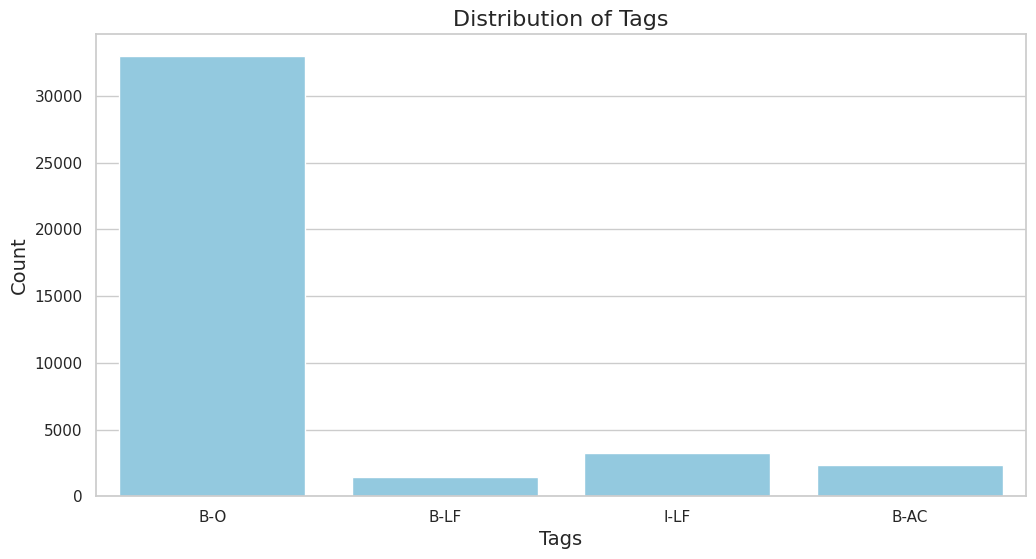

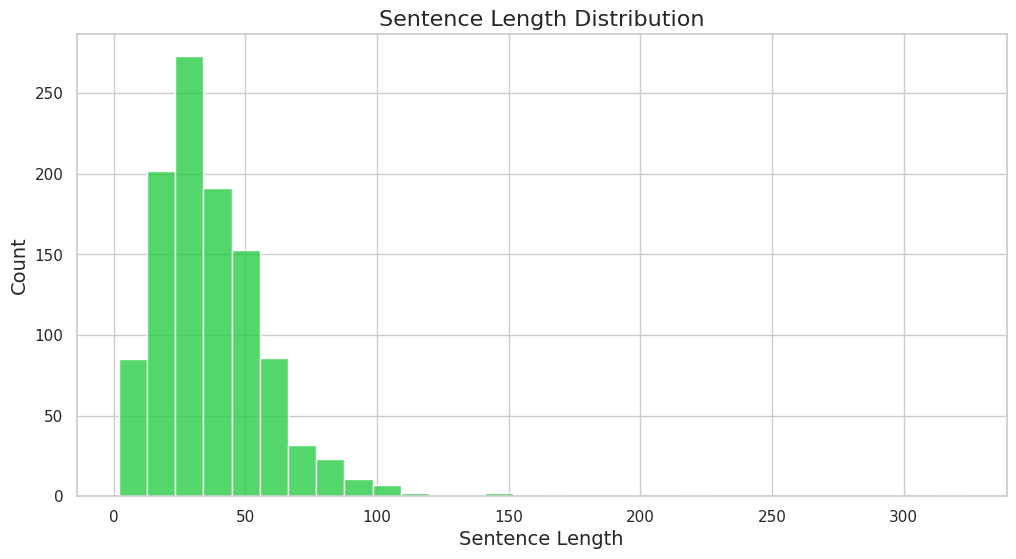

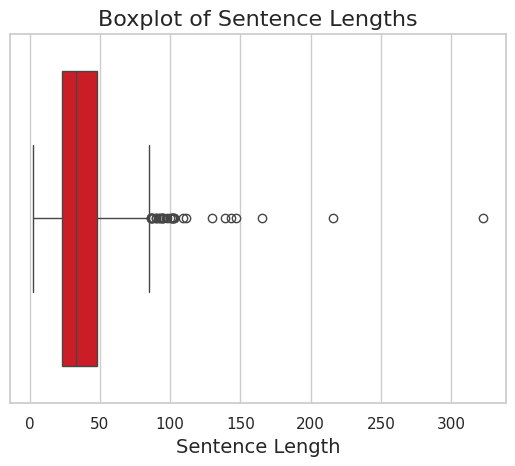

<ipython-input-5-7ad8792f01d8>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()), palette=palette)
<ipython-input-5-7ad8792f01d8>:46: UserWarning: 
The palette list has fewer values (10) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()), palette=palette)


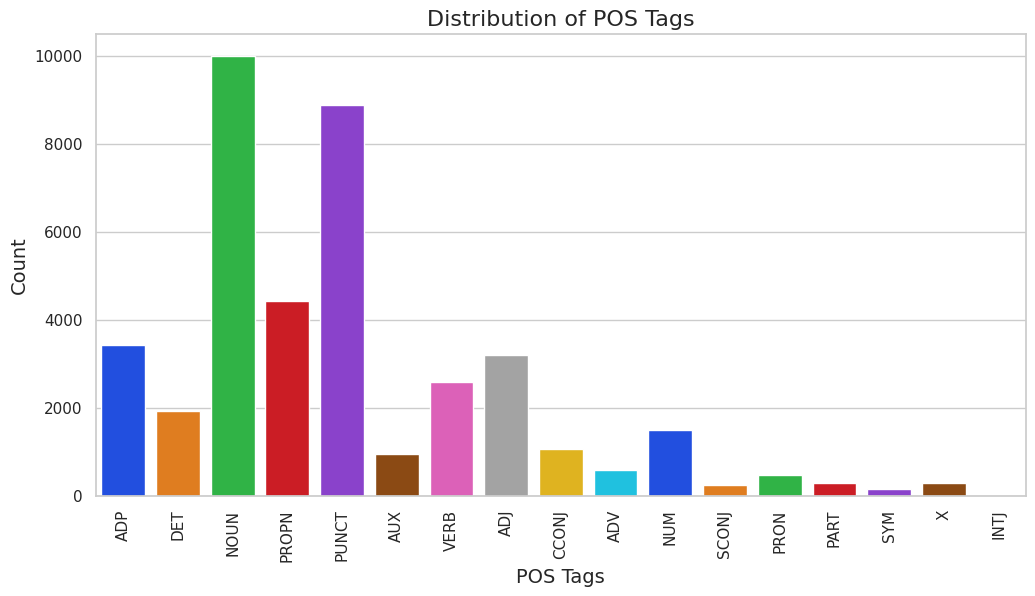

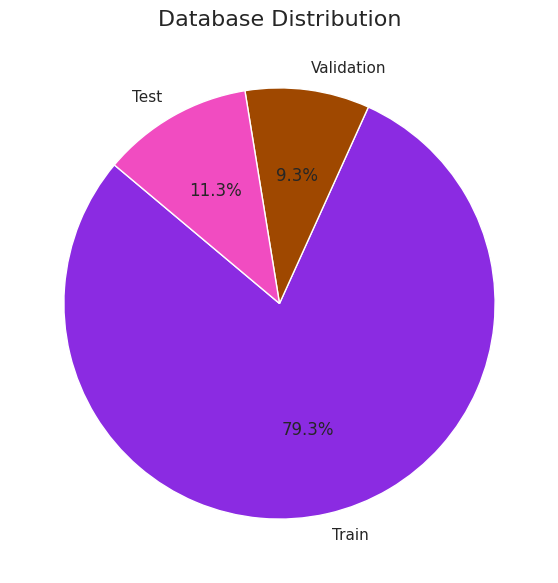

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

sns.set(style="whitegrid")
palette = sns.color_palette("bright")

def analyze_and_visualize(dataset):
    print("Dataset Size:", len(dataset['train']))
    print("Example Data Points:")

    # Display the first few records as a DataFrame for better formatting
    example_df = pd.DataFrame(dataset['train'][:5])
    print(example_df.to_string(index=False))

    # Analyzing tags
    tags = [tag for sublist in dataset['train']['ner_tags'] for tag in sublist]
    plt.figure(figsize=(12, 6))
    tag_counts = Counter(tags)
    sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()), color='skyblue')
    plt.title('Distribution of Tags', fontsize=16)
    plt.xlabel('Tags', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()

    # Analyzing sentence lengths
    sentence_lengths = [len(tokens) for tokens in dataset['train']['tokens']]
    plt.figure(figsize=(12, 6))
    sns.histplot(sentence_lengths, bins=30, color=palette[2])
    plt.title('Sentence Length Distribution', fontsize=16)
    plt.xlabel('Sentence Length', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()

    sns.boxplot(x=sentence_lengths, color=palette[3])
    plt.title('Boxplot of Sentence Lengths', fontsize=16)
    plt.xlabel('Sentence Length', fontsize=14)
    plt.show()

    # Analyzing POS tags
    pos_tags = [pos for sublist in dataset['train']['pos_tags'] for pos in sublist]
    pos_counts = Counter(pos_tags)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()), palette=palette)
    plt.title('Distribution of POS Tags', fontsize=16)
    plt.xlabel('POS Tags', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=90)
    plt.show()

    # Pie chart of database distribution
    sizes = [len(dataset['train']), len(dataset['validation']), len(dataset['test'])]
    labels = ['Train', 'Validation', 'Test']
    colors = [palette[4], palette[5], palette[6]]
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title('Database Distribution', fontsize=16)
    plt.show()

analyze_and_visualize(dataset)


# Implementing and reading Traditional and Bert Tokenization method on dataset

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Loading necessary resources from nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english') + list(string.punctuation))

# Defining Bert_Tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def traditional_tokenize(data):
    tokenized_data = []
    for split_data in data:
        split_tokenized_data = []
        for entry in split_data['tokens']:
            tokens = entry
            filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
            split_tokenized_data.append(filtered_tokens)
        tokenized_data.append(split_tokenized_data)
    return tokenized_data

def bert_tokenize(data):
    tokenized_data = []
    for split_data in data:
        split_tokenized_data = []
        for entry in split_data['tokens']:
            tokens = entry
            # Use BERT tokenizer to tokenize the tokens
            input_ids = bert_tokenizer.encode(tokens, add_special_tokens=True)
            split_tokenized_data.append(input_ids)
        tokenized_data.append(split_tokenized_data)
    return tokenized_data

#Taking part of dataset to tokenize and visualise the tokenized data
train_data = dataset['train'][:10]
validation_data = dataset['validation'][:10]
test_data = dataset['test'][:10]

#Tokenizing
traditional_train_tokens = traditional_tokenize([train_data])
traditional_validation_tokens = traditional_tokenize([validation_data])
traditional_test_tokens = traditional_tokenize([test_data])

bert_train_tokens = bert_tokenize([train_data])
bert_validation_tokens = bert_tokenize([validation_data])
bert_test_tokens = bert_tokenize([test_data])

# Printing the tokenized data
print("Traditional tokenized train data:", traditional_train_tokens)
print("Traditional tokenized validation data:", traditional_validation_tokens)
print("Traditional tokenized test data:", traditional_test_tokens)

print("BERT tokenized train data:", bert_train_tokens)
print("BERT tokenized validation data:", bert_validation_tokens)
print("BERT tokenized test data:", bert_test_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Traditional tokenized train data: [[['purpose', 'gothenburg', 'young', 'persons', 'empowerment', 'scale', 'gypes', 'developed'], ['following', 'physiological', 'traits', 'measured', 'stomatal', 'conductance', 'gs', 'mol', 'h2o', 'm-2', 's-1', 'transpiration', 'rate', 'e', 'mmol', 'h2o', 'm-2', 's-1', 'net', 'photosynthetic', 'rate', 'pn', 'μmol', 'm-2', 's-1', 'intercellular', 'co2', 'concentration', 'co2', 'ci', 'μmol', 'm-2', 's-1'], ['minor', 'h', 'antigen', 'alloimmune', 'responses', 'readily', 'occur', 'setting', 'human', 'leukocyte', 'antigen', 'hla)–matched', 'allogeneic', 'solid', 'organ', 'stem', 'cell', 'transplantation', 'sct', '3,4'], ['epi', 'echo', 'planar', 'imaging'], ['furthermore', 'enos', 'derived', 'nitrosylated', 'β', 'actin', 'cys374', 'impaired', 'actin', 'binding', 'profilin-1', 'pfn1', 'confirmed', 'transnitrosylating', 'agent', 'nitroso', 'l', 'cysteine', 'cys-no'], ['importance', 'formation', 'pfn1', 'actin', 'complexes', 'regulation', 'pkc', 'corroborated', 

# Experiment 1[System 1] - Implementing Traditional Tokenization on BiLSTM Model and Experiment 2 [System 1]-Implementing  Bi-LSTM model on Dataset

In [ ]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
nltk.download('punkt')

# Tokenize for LSTM model
tokenized_texts_train = []
for example in dataset['train']:
    tokens = [nltk.word_tokenize(sentence) for sentence in example['tokens']]
    tokenized_texts_train.extend(tokens)

# Convert tokenized texts into strings
tokenized_texts_train_strings = [' '.join(tokens) for tokens in tokenized_texts_train]

# Tokenize, vectorize, and encode the NER tags for the training set
ner_tags_train = dataset['train']['ner_tags']
flattened_ner_tags_train = [tag for sublist in ner_tags_train for tag in sublist]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the training NER tags and transform them into encoded labels
encoded_ner_tags_train = label_encoder.fit_transform(flattened_ner_tags_train)

# Initialize the TF-IDF vectorizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_texts_train_strings)

# Tokenize the text and convert it into sequences
train_sequences = tokenizer.texts_to_sequences(tokenized_texts_train_strings)

# Padding sequences to have the same length
max_len = max([len(seq) for seq in train_sequences])
X_train = pad_sequences(train_sequences, maxlen=max_len, padding='post')

# One-hot encode the labels
y_train = to_categorical(encoded_ner_tags_train)

# Define the LSTM model
def create_lstm_model(input_dim, output_dim, max_len):
    model = Sequential()
    model.add(Embedding(input_dim, output_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(LSTM(64))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Experiment 3 - Experimenting with Different loss Function and Optimizer


Experimenting with loss function: categorical_crossentropy and optimizer: adam
Epoch 1/10
1250/1250 [==============================] - 24s 14ms/step - loss: 0.6561 - accuracy: 0.8243
Epoch 2/10
1250/1250 [==============================] - 14s 12ms/step - loss: 0.6513 - accuracy: 0.8240
Epoch 3/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6416 - accuracy: 0.8243
Epoch 4/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6283 - accuracy: 0.8243
Epoch 5/10
1250/1250 [==============================] - 14s 12ms/step - loss: 0.6284 - accuracy: 0.8243
Epoch 6/10
1250/1250 [==============================] - 13s 11ms/step - loss: 0.6283 - accuracy: 0.8243
Epoch 7/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6268 - accuracy: 0.8243
Epoch 8/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6408 - accuracy: 0.8243
Epoch 9/10
1250/1250 [==============================] - 13s 11ms/step - loss: 0.4900 - a

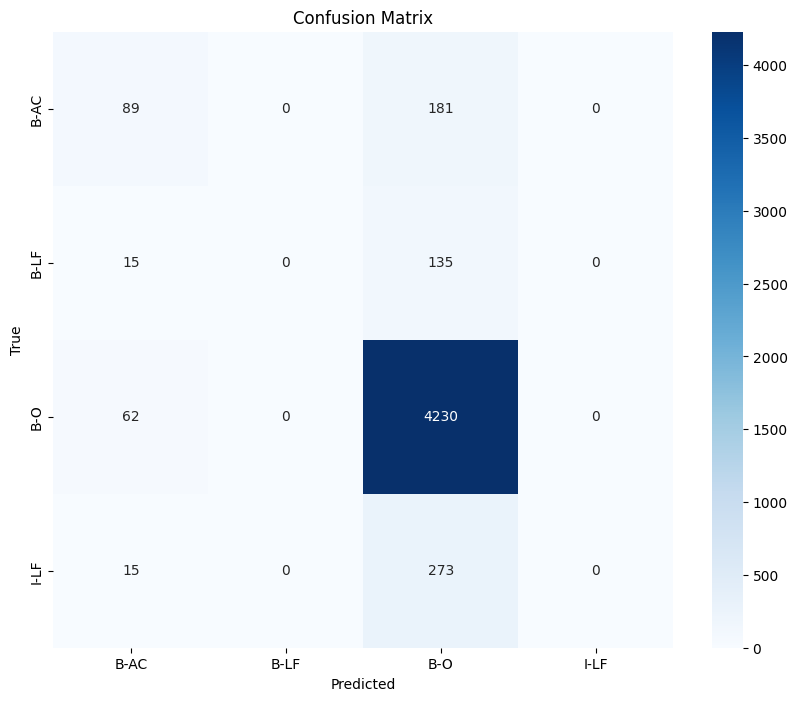


Experimenting with loss function: categorical_crossentropy and optimizer: rmsprop
Epoch 1/10
1250/1250 [==============================] - 22s 13ms/step - loss: 0.6553 - accuracy: 0.8236
Epoch 2/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6509 - accuracy: 0.8243
Epoch 3/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6503 - accuracy: 0.8243
Epoch 4/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6504 - accuracy: 0.8243
Epoch 5/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6504 - accuracy: 0.8243
Epoch 6/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6504 - accuracy: 0.8243
Epoch 7/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6503 - accuracy: 0.8243
Epoch 8/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6503 - accuracy: 0.8243
Epoch 9/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6501 

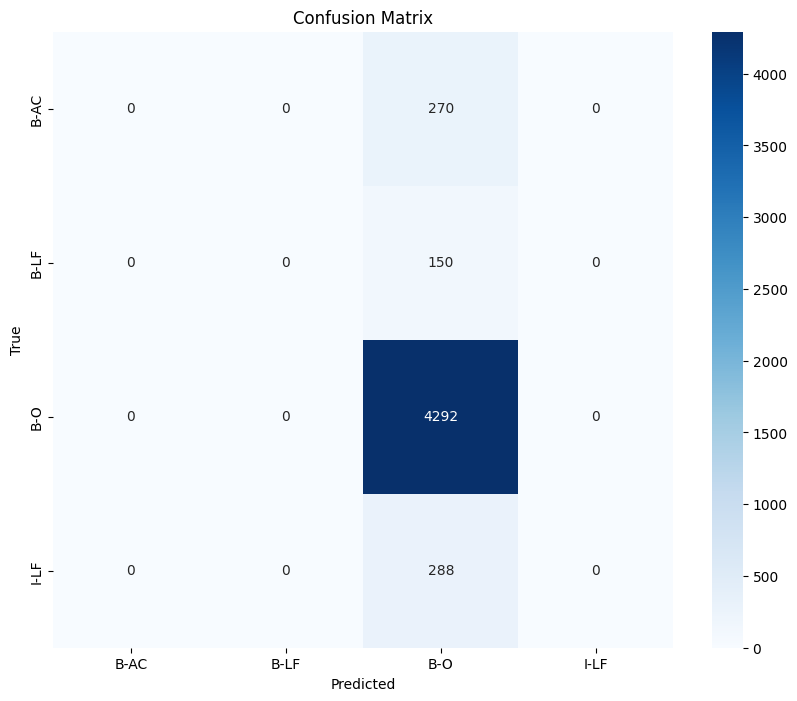


Experimenting with loss function: categorical_crossentropy and optimizer: sgd
Epoch 1/10
1250/1250 [==============================] - 18s 12ms/step - loss: 0.6669 - accuracy: 0.8237
Epoch 2/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6496 - accuracy: 0.8243
Epoch 3/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6497 - accuracy: 0.8243
Epoch 4/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6497 - accuracy: 0.8243
Epoch 5/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6496 - accuracy: 0.8243
Epoch 6/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6497 - accuracy: 0.8243
Epoch 7/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6495 - accuracy: 0.8243
Epoch 8/10
1250/1250 [==============================] - 13s 11ms/step - loss: 0.6497 - accuracy: 0.8243
Epoch 9/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6498 - ac

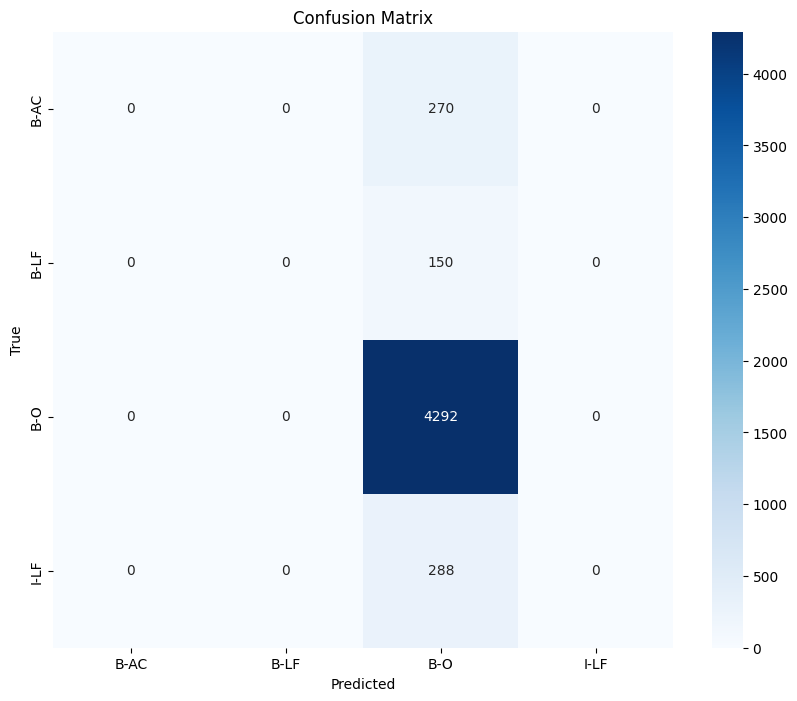


Experimenting with loss function: mean_squared_error and optimizer: adam
Epoch 1/10
1250/1250 [==============================] - 38s 20ms/step - loss: 0.0782 - accuracy: 0.8238
Epoch 2/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.0775 - accuracy: 0.8243
Epoch 3/10
1250/1250 [==============================] - 14s 12ms/step - loss: 0.0775 - accuracy: 0.8242
Epoch 4/10
1250/1250 [==============================] - 13s 11ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 5/10
1250/1250 [==============================] - 13s 11ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 6/10
1250/1250 [==============================] - 13s 11ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 7/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 8/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 9/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.0774 - accurac

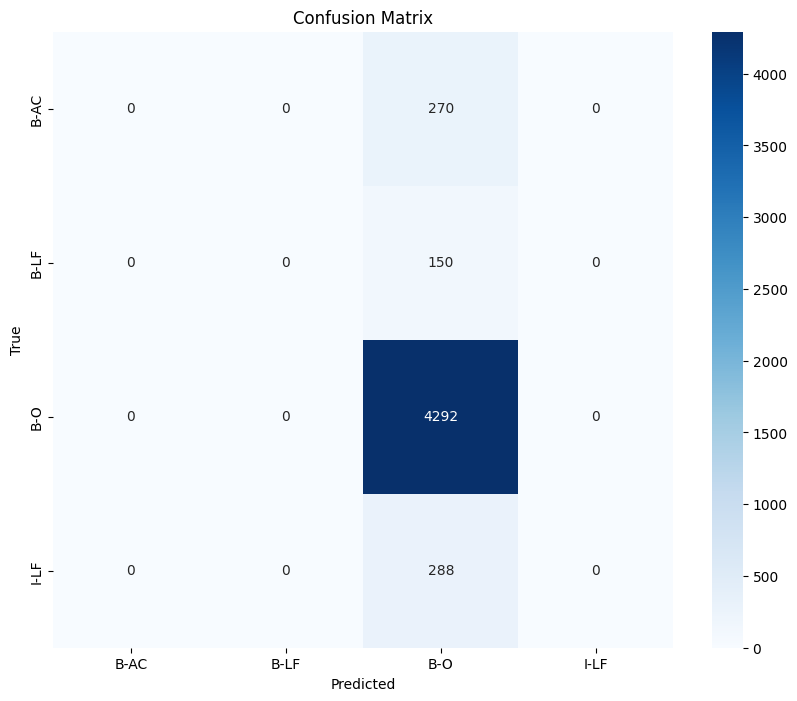


Experimenting with loss function: mean_squared_error and optimizer: rmsprop
Epoch 1/10
1250/1250 [==============================] - 18s 11ms/step - loss: 0.0781 - accuracy: 0.8237
Epoch 2/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 3/10
1250/1250 [==============================] - 13s 11ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 4/10
1250/1250 [==============================] - 13s 11ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 5/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 6/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 7/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 8/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 9/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0774 - accu

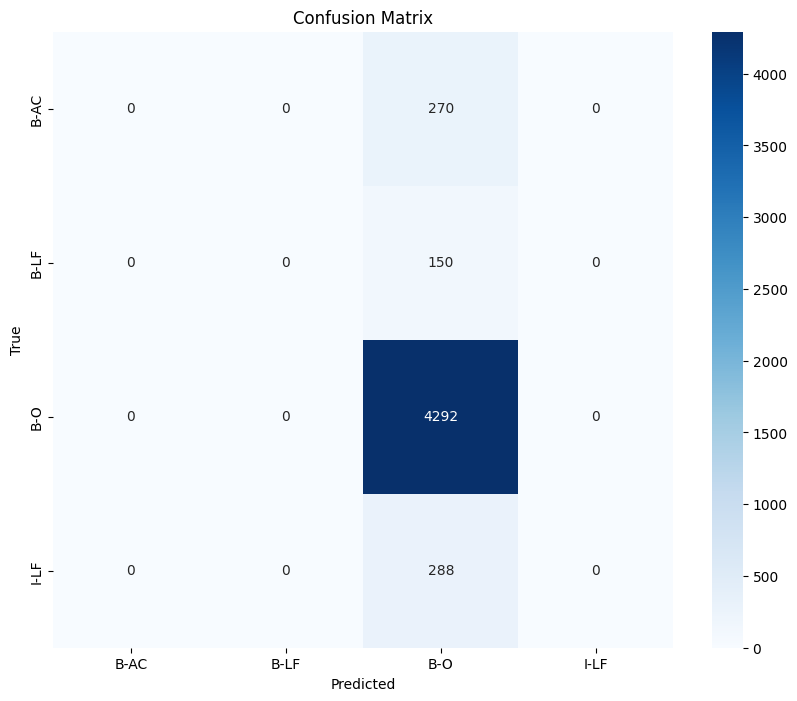


Experimenting with loss function: mean_squared_error and optimizer: sgd
Epoch 1/10
1250/1250 [==============================] - 17s 10ms/step - loss: 0.0919 - accuracy: 0.8236
Epoch 2/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.0775 - accuracy: 0.8243
Epoch 3/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 4/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 5/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 6/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.0774 - accuracy: 0.8243
Epoch 7/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0773 - accuracy: 0.8243
Epoch 8/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0773 - accuracy: 0.8243
Epoch 9/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0773 - accuracy

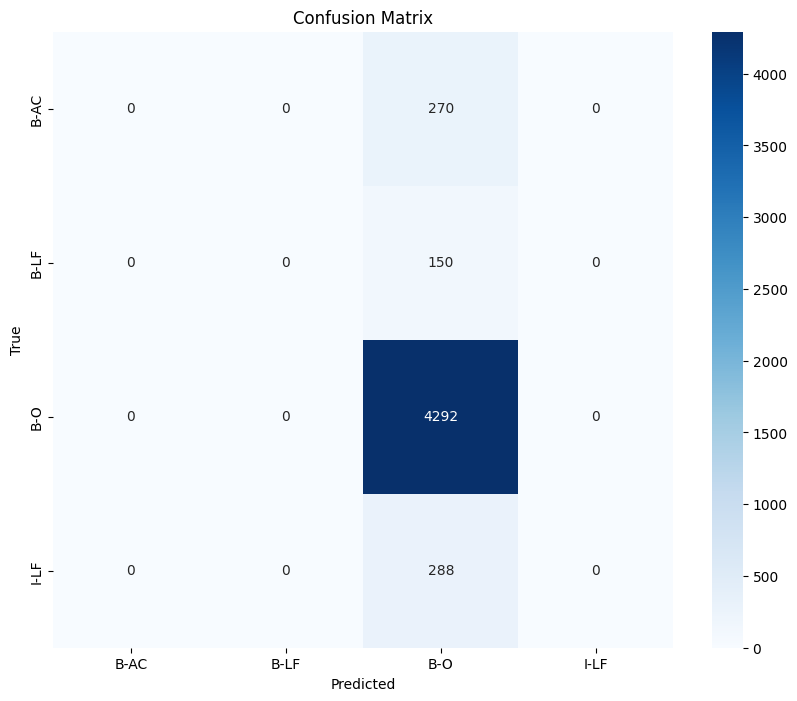

In [ ]:
# Preparing data for validation and testing for lstm model

# Tokenize, vectorize, and encode the NER tags for the validation set
tokenized_texts_validation = []
ner_tags_validation = dataset['validation']['ner_tags']
flattened_ner_tags_validation = [tag for sublist in ner_tags_validation for tag in sublist]
encoded_ner_tags_validation = label_encoder.transform(flattened_ner_tags_validation)
for example in dataset['validation']:
    tokens = [nltk.word_tokenize(sentence) for sentence in example['tokens']]
    tokenized_texts_validation.extend(tokens)
tokenized_texts_validation_strings = [' '.join(tokens) for tokens in tokenized_texts_validation]
X_validation_sequences = tokenizer.texts_to_sequences(tokenized_texts_validation_strings)
X_validation = pad_sequences(X_validation_sequences, maxlen=max_len, padding='post')
y_validation = to_categorical(encoded_ner_tags_validation)


tokenized_texts_test = []
# Prepare integer labels for the test set
encoded_ner_tags_test = label_encoder.transform([tag for sublist in dataset['test']['ner_tags'] for tag in sublist])
for example in dataset['test']:
    tokens = [nltk.word_tokenize(sentence) for sentence in example['tokens']]
    tokenized_texts_test.extend(tokens)
tokenized_texts_test_strings = [' '.join(tokens) for tokens in tokenized_texts_test]
X_test_sequences = tokenizer.texts_to_sequences(tokenized_texts_test_strings)
X_test = pad_sequences(X_test_sequences, maxlen=max_len, padding='post')
# We need to ensure y_test is padded to match X_test in sequence length
y_test = to_categorical(encoded_ner_tags_test, num_classes=len(label_encoder.classes_))


# Experiment with different loss functions and optimizers
loss = ['categorical_crossentropy','mean_squared_error']
optimizers = ['adam', 'rmsprop', 'sgd']

for loss in loss:
    for optimizer in optimizers:
        print(f"\nExperimenting with loss function: {loss} and optimizer: {optimizer}")

        # Define and compile the model
        lstm_model = create_lstm_model(len(tokenizer.word_index) + 1, len(label_encoder.classes_), max_len)
        lstm_model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

        # Train the model
        lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

        # Evaluate on Validation Set for LSTM Model
        print("Evaluation on Validation Set for  Model:")
        lstm_val_loss, lstm_val_accuracy = lstm_model.evaluate(X_validation, y_validation, verbose=1)
        print("Validation Loss:", lstm_val_loss)
        print("Validation Accuracy:", lstm_val_accuracy)

        # Predict on validation set for LSTM Model
        y_pred_validation_lstm = lstm_model.predict(X_validation)
        y_pred_validation_classes_lstm = np.argmax(y_pred_validation_lstm, axis=-1)
        y_validation_classes_lstm = np.argmax(y_validation, axis=-1)

        # Flatten predictions and true labels for F1 and confusion matrix
        y_pred_validation_flat_lstm = y_pred_validation_classes_lstm.flatten()
        y_validation_flat_lstm = y_validation_classes_lstm.flatten()

        # F1 Score and Confusion Matrix for LSTM Model
        f1_validation_lstm = f1_score(y_validation_flat_lstm, y_pred_validation_flat_lstm, average='macro')
        conf_matrix_validation_lstm = confusion_matrix(y_validation_flat_lstm, y_pred_validation_flat_lstm)
        print("Validation F1 Score for LSTM:", f1_validation_lstm)
        print("Validation Confusion Matrix for LSTM:\n", conf_matrix_validation_lstm)

        print("Evaluation on Test Set for Model:")

        lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test, y_test, verbose=1)
        print("Test Loss:", lstm_test_loss)
        print("Test Accuracy:", lstm_test_accuracy)

        # Predict on test set for LSTM Model
        y_pred_test_lstm = lstm_model.predict(X_test)
        y_pred_test_classes_lstm = np.argmax(y_pred_test_lstm, axis=-1)
        y_test_classes_lstm = np.argmax(y_test, axis=-1)

        # Flatten predictions and true labels for F1 and confusion matrix
        y_pred_test_flat_lstm = y_pred_test_classes_lstm.flatten()
        y_test_flat_lstm = y_test_classes_lstm.flatten()

        # F1 Score and Confusion Matrix for LSTM Model
        f1_test_lstm = f1_score(y_test_flat_lstm, y_pred_test_flat_lstm, average='macro')
        conf_matrix_test_lstm = confusion_matrix(y_test_flat_lstm, y_pred_test_flat_lstm)
        print("Test F1 Score for LSTM:", f1_test_lstm)
        print("Test Confusion Matrix for LSTM:\n", conf_matrix_test_lstm)
        # Plot Confusion Matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_matrix_test_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

#Experiment 1 [System 2] - Implementing LSTM model with Bert Tokanization

Training data shape: (1072, 128)
Training labels shape: (1072, 128)
Validation data shape: (126, 128)
Validation labels shape: (126, 128)
Epoch 1/10
34/34 [==============================] - 14s 182ms/step - loss: 0.9141 - accuracy: 0.5899 - val_loss: 0.5829 - val_accuracy: 0.6365
Epoch 2/10
34/34 [==============================] - 3s 101ms/step - loss: 0.6269 - accuracy: 0.6049 - val_loss: 0.5543 - val_accuracy: 0.6365
Epoch 3/10
34/34 [==============================] - 3s 96ms/step - loss: 0.5885 - accuracy: 0.6046 - val_loss: 0.5322 - val_accuracy: 0.6355
Epoch 4/10
34/34 [==============================] - 2s 64ms/step - loss: 0.5426 - accuracy: 0.6056 - val_loss: 0.5233 - val_accuracy: 0.6364
Epoch 5/10
34/34 [==============================] - 2s 68ms/step - loss: 0.4974 - accuracy: 0.6100 - val_loss: 0.5374 - val_accuracy: 0.6380
Epoch 6/10
34/34 [==============================] - 2s 63ms/step - loss: 0.4591 - accuracy: 0.6155 - val_loss: 0.5666 - val_accuracy: 0.6324
Epoch 7/10
34

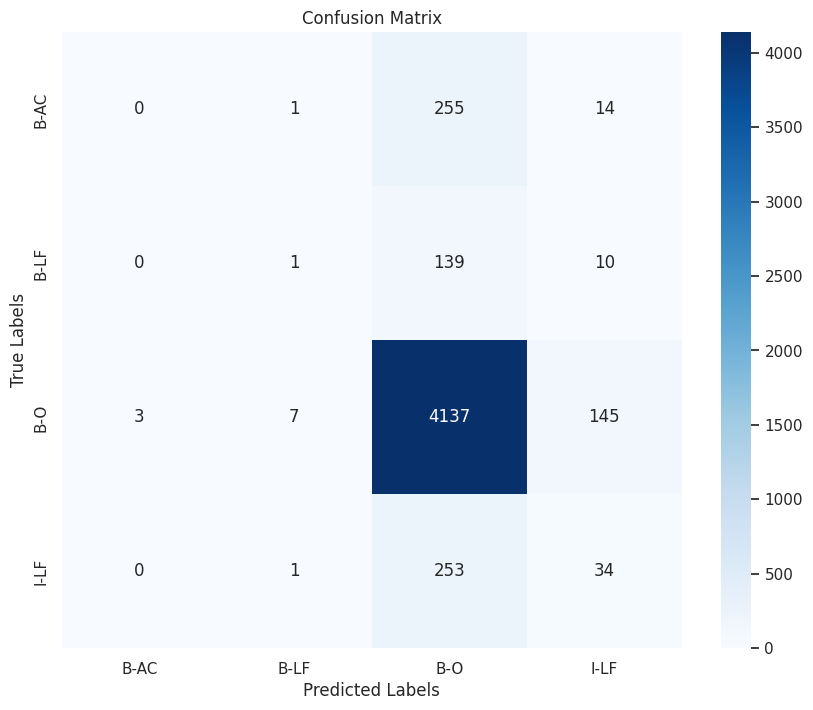

In [ ]:
from transformers import BertTokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Bidirectional, Masking
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np
from datasets import load_dataset
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Initialize and fit label encoder
label_encoder = LabelEncoder()
all_labels = [label for sublist in dataset['train']['ner_tags'] + dataset['validation']['ner_tags'] + dataset['test']['ner_tags'] for label in sublist]
label_encoder.fit(all_labels)

def tokenize_and_align_labels(data_split, tokenizer, label_encoder, max_length=128):
    input_ids = []
    attention_masks = []
    labels = []

    for tokens, label_seq in zip(data_split['tokens'], data_split['ner_tags']):
        tokenized_output = tokenizer.encode_plus(
            tokens,
            truncation=True,
            padding='max_length',
            max_length=max_length,
            is_split_into_words=True,
            return_tensors="np"
        )
        input_ids.append(tokenized_output['input_ids'][0])
        attention_masks.append(tokenized_output['attention_mask'][0])

        # Transform labels to correspond to token indices and apply padding
        label_ids = [label_encoder.transform([label])[0] for label in label_seq]
        # Ensure label_ids do not exceed max_length
        label_ids = label_ids[:max_length]
        padded_labels = np.ones(max_length, dtype=int) * -100  # Use -100 for padding
        padded_labels[:len(label_ids)] = label_ids
        labels.append(padded_labels)

    return np.array(input_ids), np.array(attention_masks), np.array(labels)

#Tokenizing dataset
X_train, attention_masks_train, y_train = tokenize_and_align_labels(dataset['train'], tokenizer, label_encoder)
X_val, attention_masks_val, y_val = tokenize_and_align_labels(dataset['validation'], tokenizer, label_encoder)
X_test, attention_masks_test, y_test = tokenize_and_align_labels(dataset['test'], tokenizer, label_encoder)


num_classes = len(label_encoder.classes_)

import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy

def custom_sparse_categorical_crossentropy(y_true, y_pred):
    # Create a mask based on y_true not being -100
    mask = tf.not_equal(y_true, -100)

    # Use the mask to filter y_pred and y_true for loss calculation
    y_true_filtered = tf.boolean_mask(y_true, mask)
    y_pred_filtered = tf.boolean_mask(y_pred, mask)

    # Calculate the loss using SparseCategoricalCrossentropy
    scce = SparseCategoricalCrossentropy(from_logits=False)
    loss = scce(y_true_filtered, y_pred_filtered)
    return loss


# Building the model
input_layer = Input(shape=(128,), dtype='int32')
masking_layer = Masking(mask_value=-100)(input_layer)  # Assuming -100 is used for padding
embedding_layer = Embedding(input_dim=len(tokenizer.vocab), output_dim=128, mask_zero=True)(masking_layer)
lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)
output_layer = Dense(num_classes, activation='softmax')(lstm_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss=custom_sparse_categorical_crossentropy, metrics=['accuracy'])

# Checking shapes of input data and labels before training
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)

# Training the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10)

# Evaluateing the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Get predictions for test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=-1)  # Convert probabilities to class labels

# Flatten y_test and y_pred for metric calculations
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Filter out padding values (-100 in y_test) from metric calculations
mask = y_test_flat != -100
y_test_filtered = y_test_flat[mask]
y_pred_filtered = y_pred_flat[mask]

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_filtered, y_pred_filtered, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test_filtered, y_pred_filtered)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Experiment 2 [System 2] - CRF model with Traditional Tokenization

In [ ]:
!pip install tf2crf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.6 MB/s eta 0:00:00


Epoch 1/10
1250/1250 [==============================] - 63s 44ms/step - loss: 1.1597 - accuracy: 0.9888
Epoch 2/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.5220 - accuracy: 0.9951
Epoch 3/10
1250/1250 [==============================] - 53s 43ms/step - loss: 0.4880 - accuracy: 0.9952
Epoch 4/10
1250/1250 [==============================] - 55s 44ms/step - loss: 0.4711 - accuracy: 0.9953
Epoch 5/10
1250/1250 [==============================] - 53s 42ms/step - loss: 0.4593 - accuracy: 0.9953
Epoch 6/10
1250/1250 [==============================] - 53s 42ms/step - loss: 0.4491 - accuracy: 0.9953
Epoch 7/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.4430 - accuracy: 0.9954
Epoch 8/10
1250/1250 [==============================] - 53s 42ms/step - loss: 0.4377 - accuracy: 0.9955
Epoch 9/10
1250/1250 [==============================] - 55s 44ms/step - loss: 0.4303 - accuracy: 0.9957
Epoch 10/10
4/4 [==============================] - 1s 28ms/step 

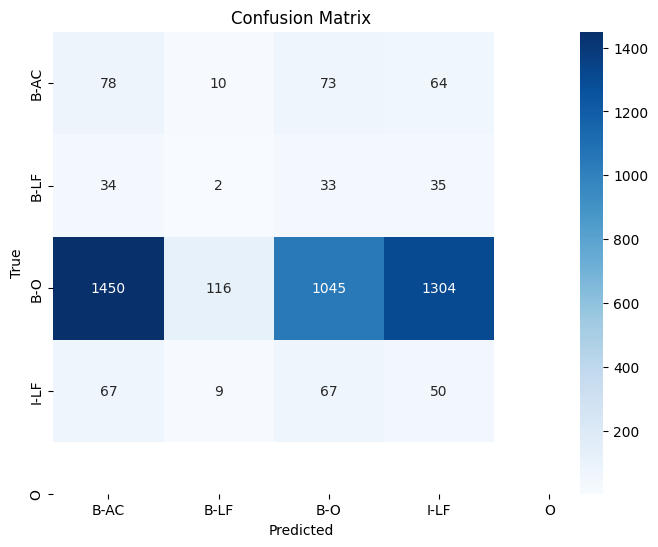

In [ ]:
#CRF model
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Embedding, Bidirectional, LSTM, TimeDistributed, Dense
from tf2crf import CRF, ModelWithCRFLoss
import numpy as np
import nltk
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_fscore_support

# Tokenize the text
tokenized_texts_train = []
for example in dataset['train']:
    tokens = [nltk.word_tokenize(sentence) for sentence in example['tokens']]
    tokenized_texts_train.extend(tokens)

# Convert tokenized texts into strings
tokenized_texts_train_strings = [' '.join(tokens) for tokens in tokenized_texts_train]

# Tokenize, vectorize, and encode the NER tags for the training set
ner_tags_train = dataset['train']['ner_tags']
flattened_ner_tags_train = [tag for sublist in ner_tags_train for tag in sublist]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the training NER tags and transform them into encoded labels
encoded_ner_tags_train = label_encoder.fit_transform(flattened_ner_tags_train)

# Initialize the TF-IDF vectorizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_texts_train_strings)

# Tokenize the text and convert it into sequences
train_sequences = tokenizer.texts_to_sequences(tokenized_texts_train_strings)

# Padding sequences to have the same length
max_len = max([len(seq) for seq in train_sequences])
X_train = pad_sequences(train_sequences, maxlen=max_len, padding='post')

# One-hot encode the labels
y_train = to_categorical(encoded_ner_tags_train)


# First, create an array to accumulate the labels with proper alignment to the sequences
y_train = []
index = 0  # to track position in the flattened label list

for seq in train_sequences:
    sequence_length = len(seq)
    sequence_labels = encoded_ner_tags_train[index:index + sequence_length]
    # Pad labels if necessary to match max_len
    if len(sequence_labels) < max_len:
        sequence_labels = np.pad(sequence_labels, (0, max_len - len(sequence_labels)), 'constant', constant_values=(0,))
    y_train.append(sequence_labels)
    index += sequence_length

y_train = np.array(y_train)


def create_lstm_crf_model(input_dim, output_dim, max_len):
    # Define the input layer
    input_layer = Input(shape=(max_len,))

    # Embedding layer
    embedding = Embedding(input_dim, output_dim, input_length=max_len)(input_layer)

    # Bi-directional LSTM
    lstm = Bidirectional(LSTM(128, return_sequences=True))(embedding)

    # TimeDistributed Dense layer
    dense = TimeDistributed(Dense(output_dim))(lstm)

    # CRF layer
    crf_layer = CRF()

    # Add the CRF layer to the model using the ModelWithCRFLoss to wrap the original model and CRF layer
    output = crf_layer(dense)
    base_model = Model(input_layer, output)
    model = ModelWithCRFLoss(base_model)

    model.compile(optimizer='adam')
    return model


# Create and train the LSTM-CRF model
lstm_crf_model = create_lstm_crf_model(len(tokenizer.word_index) + 1, len(label_encoder.classes_), max_len)
lstm_crf_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


# Prepare data for validation set
tokenized_texts_validation = [nltk.word_tokenize(' '.join(tokens)) for tokens in dataset['validation']['tokens']]
X_validation = pad_sequences(tokenizer.texts_to_sequences(tokenized_texts_validation), maxlen=max_len, padding='post')

# Initialize the LabelEncoder and fit it with all possible labels including 'O'
unique_labels = set([label for sublist in train_data['ner_tags'] for label in sublist])
unique_labels.add('O')  # Include 'O' in the set of unique labels
label_encoder = LabelEncoder()
label_encoder.fit(list(unique_labels))

# When padding y arrays, ensure 'O' is correctly transformed
o_label_index = label_encoder.transform(['O'])[0]

# Prepare integer labels for validation set
encoded_ner_tags_validation = label_encoder.transform([tag for sublist in dataset['validation']['ner_tags'] for tag in sublist])
y_validation = [encoded_ner_tags_validation[index:index + len(seq)] for index, seq in enumerate(X_validation)]
y_validation = np.array([np.pad(seq, (0, max_len - len(seq)), mode='constant', constant_values=o_label_index) for seq in y_validation])

# Evaluate on Validation Set
validation_results = lstm_crf_model.evaluate(X_validation, y_validation, verbose=1)
print("Validation Loss:", validation_results[0])
print("Validation Accuracy:", validation_results[1])

# Predict on validation set
y_pred_validation = lstm_crf_model.predict(X_validation)
y_pred_validation_flat = [item for sublist in y_pred_validation for item in sublist]
y_validation_flat = [item for sublist in y_validation for item in sublist]

# F1 Score and Confusion Matrix for Validation Set
f1_validation = f1_score(y_validation_flat, y_pred_validation_flat, average='macro')
conf_matrix_validation = confusion_matrix(y_validation_flat, y_pred_validation_flat)
print("Validation F1 Score:", f1_validation)
print("Validation Confusion Matrix:\n", conf_matrix_validation)


# Prepare data for test set
tokenized_texts_test = [nltk.word_tokenize(' '.join(tokens)) for tokens in dataset['test']['tokens']]
X_test = pad_sequences(tokenizer.texts_to_sequences(tokenized_texts_test), maxlen=max_len, padding='post')

# Prepare integer labels for testing set
encoded_ner_tags_test = label_encoder.transform([tag for sublist in dataset['test']['ner_tags'] for tag in sublist])
y_test = [encoded_ner_tags_test[index:index + len(seq)] for index, seq in enumerate(X_test)]
y_test = np.array([np.pad(seq, (0, max_len - len(seq)), mode='constant', constant_values=o_label_index) for seq in y_test])

# Evaluate on Test Set
test_results = lstm_crf_model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

# Predict on test set
y_pred_test = lstm_crf_model.predict(X_test)
y_pred_test_flat = [item for sublist in y_pred_test for item in sublist]
y_test_flat = [item for sublist in y_test for item in sublist]

# F1 Score and Confusion Matrix for Test Set

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_flat, y_pred_test_flat, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

conf_matrix_test = confusion_matrix(y_test_flat, y_pred_test_flat)
print("Test Confusion Matrix:\n", conf_matrix_test)


# Plot Confusion Matrix for Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Experiment 4 - Hyper Parameter Tuning for Bi-LSTM model with Traditional Tokenization

In [ ]:
#Preparing data for LSTM model
from keras.preprocessing.text import Tokenizer
#Tokenizing for LSTM model
tokenized_texts_train = []
for example in dataset['train']:
    tokens = [nltk.word_tokenize(sentence) for sentence in example['tokens']]
    tokenized_texts_train.extend(tokens)

# Convert tokenized texts into strings
tokenized_texts_train_strings = [' '.join(tokens) for tokens in tokenized_texts_train]

# Tokenize, vectorize, and encode the NER tags for the training set
ner_tags_train = dataset['train']['ner_tags']
flattened_ner_tags_train = [tag for sublist in ner_tags_train for tag in sublist]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the training NER tags and transform them into encoded labels
encoded_ner_tags_train = label_encoder.fit_transform(flattened_ner_tags_train)

# Initialize the TF-IDF vectorizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_texts_train_strings)

# Tokenize the text and convert it into sequences
train_sequences = tokenizer.texts_to_sequences(tokenized_texts_train_strings)

# Padding sequences to have same length
max_len = max([len(seq) for seq in train_sequences])
X_train = pad_sequences(train_sequences, maxlen=max_len, padding='post')

# One-hot encode the labels
y_train = to_categorical(encoded_ner_tags_train)


In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [ ]:
from kerastuner import HyperModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

class LSTMHyperModel(HyperModel):
    def __init__(self, input_dim, output_dim, max_len):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.max_len = max_len

    def build(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=self.input_dim, output_dim=self.output_dim, input_length=self.max_len))

        # Tuning the number of units in the LSTM layers
        for i in range(hp.Int('num_lstm_layers', 1, 3)):
            model.add(Bidirectional(LSTM(units=hp.Int('lstm_units_' + str(i), min_value=32, max_value=256, step=32), return_sequences=True if i < hp.get('num_lstm_layers') - 1 else False)))

        model.add(Dense(self.output_dim, activation='softmax'))

        # Compile model
        model.compile(
            optimizer=Adam(
                hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

        return model


<ipython-input-9-0ceed3a4a79c>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


Reloading Tuner from keras_tuner_grid/lstm_grid_search/tuner0.json
Trial 0:
Hyperparameters: {'num_lstm_layers': 1, 'lstm_units_0': 32, 'learning_rate': 0.01}
Validation Accuracy: 0.8578749895095825

Trial 3:
Hyperparameters: {'num_lstm_layers': 1, 'lstm_units_0': 64, 'learning_rate': 0.01}
Validation Accuracy: 0.8575000166893005

Trial 1:
Hyperparameters: {'num_lstm_layers': 1, 'lstm_units_0': 32, 'learning_rate': 0.001}
Validation Accuracy: 0.8529999852180481

Trial 4:
Hyperparameters: {'num_lstm_layers': 1, 'lstm_units_0': 64, 'learning_rate': 0.001}
Validation Accuracy: 0.8528749942779541

Trial 2:
Hyperparameters: {'num_lstm_layers': 1, 'lstm_units_0': 32, 'learning_rate': 0.0001}
Validation Accuracy: 0.8483750224113464

Best Hyperparameters from grid search: {'num_lstm_layers': 1, 'lstm_units_0': 32, 'learning_rate': 0.01}
Best Validation Accuracy: 0.8578749895095825


157/157 [==============================] - 3s 6ms/step - loss: 0.7446 - accuracy: 0.8638
Test Loss: 0.7446271181106567
Test Accuracy: 0.8637999892234802
157/157 [==============================] - 1s 3ms/step
F1 Score: 0.8355736841361948
Confusion Matrix:
 [[  83    0  180    7]
 [   1   17  129    3]
 [  31   38 4182   41]
 [   2   18  231   37]]


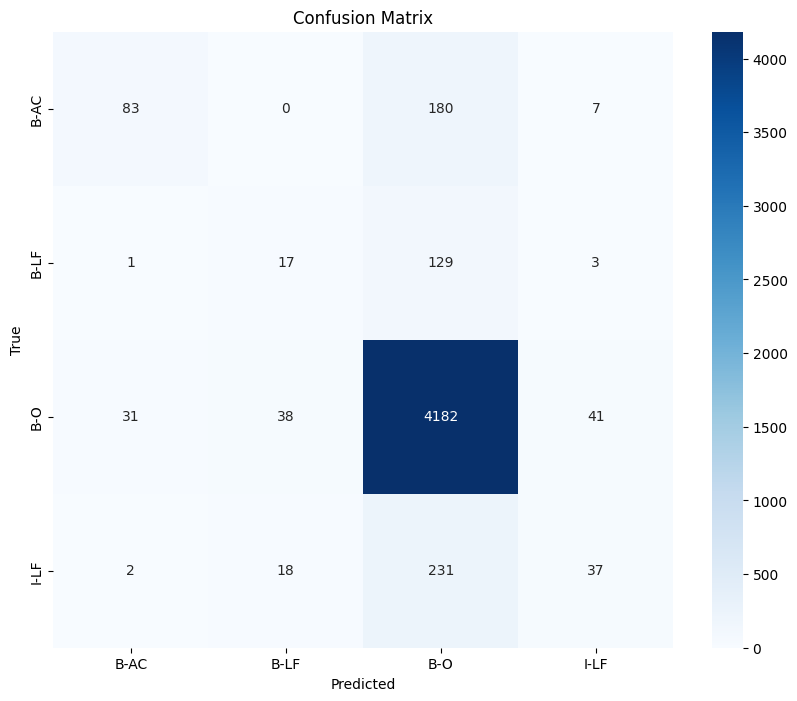

In [ ]:
from kerastuner.tuners import GridSearch
hypermodel = LSTMHyperModel(input_dim=len(tokenizer.word_index) + 1, output_dim=len(label_encoder.classes_), max_len=max_len)

grid_tuner = GridSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=5,  # This is the product of the possibilities for each hyperparameter
    executions_per_trial=1,
    directory='keras_tuner_grid',
    project_name='lstm_grid_search'
)

grid_tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

for trial in grid_tuner.oracle.get_best_trials(5):
    print(f"Trial {trial.trial_id}:")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Validation Accuracy: {trial.score}")
    print()


best_trial = grid_tuner.oracle.get_best_trials(1)[0]
best_hps = best_trial.hyperparameters
best_accuracy = best_trial.score
print(f"Best Hyperparameters from grid search: {best_hps.values}")
print(f"Best Validation Accuracy: {best_accuracy}")

#Preparing testing data for LSTM model
tokenized_texts_test = []
# Prepare integer labels for the test set
encoded_ner_tags_test = label_encoder.transform([tag for sublist in dataset['test']['ner_tags'] for tag in sublist])
for example in dataset['test']:
    tokens = [nltk.word_tokenize(sentence) for sentence in example['tokens']]
    tokenized_texts_test.extend(tokens)
tokenized_texts_test_strings = [' '.join(tokens) for tokens in tokenized_texts_test]
X_test_sequences = tokenizer.texts_to_sequences(tokenized_texts_test_strings)
X_test = pad_sequences(X_test_sequences, maxlen=max_len, padding='post')
# We need to ensure y_test is padded to match X_test in sequence length
y_test = to_categorical(encoded_ner_tags_test, num_classes=len(label_encoder.classes_))

# Get the best model
best_model = grid_tuner.get_best_models(num_models=1)[0]

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Prediction and evaluation metrics
predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# F1 Score and Confusion Matrix
f1 = f1_score(true_classes, predicted_classes, average='weighted')
cm = confusion_matrix(true_classes, predicted_classes)

print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=5,  # Specifies how many different models to try
    executions_per_trial=1,
    directory='keras_tuner_random',
    project_name='lstm_random_search'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

for trial in tuner.oracle.get_best_trials(5):
    print(f"Trial {trial.trial_id}:")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Validation Accuracy: {trial.score}")
    print()


best_trial = tuner.oracle.get_best_trials(1)[0]
best_hps = best_trial.hyperparameters
best_accuracy = best_trial.score
print(f"Best Hyperparameters from random search: {best_hps.values}")
print(f"Best Validation Accuracy: {best_accuracy}")

Reloading Tuner from keras_tuner_random/lstm_random_search/tuner0.json
Trial 1:
Hyperparameters: {'num_lstm_layers': 3, 'lstm_units_0': 192, 'learning_rate': 0.001, 'lstm_units_1': 96, 'lstm_units_2': 224}
Validation Accuracy: 0.8577499985694885

Trial 0:
Hyperparameters: {'num_lstm_layers': 3, 'lstm_units_0': 96, 'learning_rate': 0.01, 'lstm_units_1': 32, 'lstm_units_2': 32}
Validation Accuracy: 0.8522499799728394

Trial 3:
Hyperparameters: {'num_lstm_layers': 3, 'lstm_units_0': 32, 'learning_rate': 0.001, 'lstm_units_1': 192, 'lstm_units_2': 224}
Validation Accuracy: 0.8510000109672546

Trial 4:
Hyperparameters: {'num_lstm_layers': 1, 'lstm_units_0': 256, 'learning_rate': 0.0001, 'lstm_units_1': 64, 'lstm_units_2': 96}
Validation Accuracy: 0.8479999899864197

Trial 2:
Hyperparameters: {'num_lstm_layers': 2, 'lstm_units_0': 256, 'learning_rate': 0.01, 'lstm_units_1': 32, 'lstm_units_2': 192}
Validation Accuracy: 0.8431249856948853

Best Hyperparameters from random search: {'num_lstm_l

In [ ]:
#Preparing testing data for LSTM model
tokenized_texts_test = []
# Prepare integer labels for the test set
encoded_ner_tags_test = label_encoder.transform([tag for sublist in dataset['test']['ner_tags'] for tag in sublist])
for example in dataset['test']:
    tokens = [nltk.word_tokenize(sentence) for sentence in example['tokens']]
    tokenized_texts_test.extend(tokens)
tokenized_texts_test_strings = [' '.join(tokens) for tokens in tokenized_texts_test]
X_test_sequences = tokenizer.texts_to_sequences(tokenized_texts_test_strings)
X_test = pad_sequences(X_test_sequences, maxlen=max_len, padding='post')
# We need to ensure y_test is padded to match X_test in sequence length
y_test = to_categorical(encoded_ner_tags_test, num_classes=len(label_encoder.classes_))

157/157 [==============================] - 8s 18ms/step - loss: 0.5740 - accuracy: 0.8652
Test Loss: 0.5739598274230957
Test Accuracy: 0.8651999831199646
157/157 [==============================] - 5s 10ms/step
F1 Score: 0.8282632212400238
Confusion Matrix:
 [[  72    0  198    0]
 [   3    0  140    7]
 [  35    2 4216   39]
 [   6    1  243   38]]


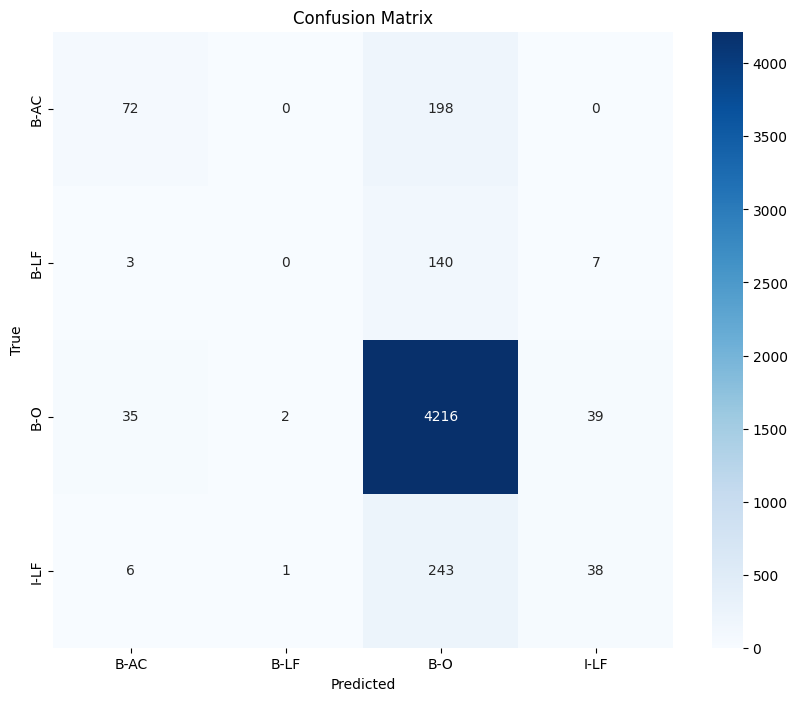

In [ ]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Prediction and evaluation metrics
predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# F1 Score and Confusion Matrix
f1 = f1_score(true_classes, predicted_classes, average='weighted')
cm = confusion_matrix(true_classes, predicted_classes)

print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()